# Exercise M6.04

The aim of this exercise is to:

* verify if a GBDT tends to overfit if the number of estimators is not appropriate as previously seen for AdaBoost;
* use the early-stopping strategy to avoid adding unnecessary trees, to get the best generalization performances.

We will use the California housing dataset to conduct our experiments.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100 # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0,
                                                                   test_size=.5)

Create a gradient boosting decision tree with `max_depth=5` and `learning_rate=.5`

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
gbdt = GradientBoostingRegressor(max_depth=5, learning_rate=.5)

Create a validation curve to assess the impact of the number of trees on the generalization performance of the model. Evaluate the list of parameters `param_range = [1, 2, 5, 10, 20, 50, 100]` and use the mean absolute error to assess the generalization performance of the model.

In [6]:
from sklearn.model_selection import validation_curve

param_range = [1, 2, 5, 10, 20, 50, 100]
gbdt_train_scores, gbdt_test_scores = validation_curve(
    gbdt,
    data_train,
    target_train,
    param_name="n_estimators",
    param_range=param_range,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
gbdt_train_errors, gbdt_test_errors = -gbdt_train_scores, -gbdt_test_scores

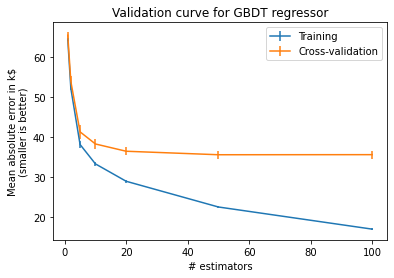

In [7]:
import matplotlib.pyplot as plt

plt.errorbar(
    param_range,
    gbdt_train_errors.mean(axis=1),
    yerr=gbdt_train_errors.std(axis=1),
    label="Training",
)
plt.errorbar(
    param_range,
    gbdt_test_errors.mean(axis=1),
    yerr=gbdt_test_errors.std(axis=1),
    label="Cross-validation",
)

plt.legend()
plt.ylabel("Mean absolute error in k$\n(smaller is better)")
plt.xlabel("# estimators")
_ = plt.title("Validation curve for GBDT regressor")

Unlike AdaBoost, the gradient boosting model will always improve when increasing the number of trees in the ensemble. However, it will reach a plateau where adding new trees will just make fitting and scoring slower.

To avoid adding new unnecessary tree, gradient boosting offers an early-stopping option. Internally, the algorithm will use an out-of-sample set to compute the generalization performance of the model at each addition of a tree. Thus, if the generalization performance is not improving for several iterations, it will stop adding trees.

Now create a gradient-boosting model with `n_estimators=1000`. This number of trees will be too large. Change the parameter `n_iter_no_change` such that the gradient boosting fitting will stop after adding 5 trees that do not improve the overall generalization performance.

In [8]:
gbdt = GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=5)
gbdt.fit(data_train, target_train)
gbdt.n_estimators_

/Users/athena/opt/miniconda3/envs/work/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


294

We see that the number of trees used is far below 1000 with the current dataset. Training the GBDT with the entire 1000 trees would have been useless